In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import ast
import re

In [2]:
def fix_dict(ds: str) -> dict:
    fixed = re.sub(r"('position':) <Positions.[a-zA-Z]*: ([0-9])>", r"\1 \2", ds)
    fixed_dict = ast.literal_eval(fixed)
    observation = fixed_dict.pop("observation")
    return {**fixed_dict, **observation}

In [9]:
run_data = []

for i in range(1, 4):
    data = pd.read_csv(f"./data/result-{i}.csv")
    data = data.drop(["Unnamed: 0"], axis=1)
    run_data.append(data)

infos = []
for i, data in enumerate(run_data):
    info = pd.DataFrame(list(map(fix_dict, data["info"].tolist())))
    info["Run"] = i
    infos.append(info)

infos[0]

,total_reward,total_profit,position,time,open,high,low,close,tick_volume,spread,...,twitter_negative_mention_max,twitter_score_count,twitter_score_mean,twitter_score_std,twitter_score_min,twitter_score_25%,twitter_score_50%,twitter_score_75%,twitter_score_max,Run
0,0.000000,1.000000,1,1.000009,0.015143,0.014581,0.015708,0.014954,0.413223,0.5,...,0.161733,0.92,0.284881,0.170952,0.165639,0.251861,0.291256,0.321128,0.386806,0
1,0.000000,1.000000,1,1.000011,0.014196,0.014012,0.013626,0.012304,0.446281,0.5,...,0.161733,0.92,0.284881,0.170952,0.165639,0.251861,0.291256,0.321128,0.386806,0
2,0.000000,1.000000,1,1.000013,0.011925,0.011172,0.011734,0.010411,0.479339,0.5,...,0.161733,0.92,0.284881,0.170952,0.165639,0.251861,0.291256,0.321128,0.386806,0
3,0.000000,1.000000,1,1.000016,0.010411,0.011740,0.011355,0.009843,0.429752,0.5,...,0.161733,0.92,0.284881,0.170952,0.165639,0.251861,0.291256,0.321128,0.386806,0
4,0.000000,1.000000,1,1.000018,0.009654,0.011172,0.009463,0.007571,0.429752,0.5,...,0.161733,0.92,0.284881,0.170952,0.165639,0.251861,0.291256,0.321128,0.386806,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19488,2084.043157,6.433233,0,1.252535,0.500473,0.501610,0.502082,0.500473,0.380165,0.5,...,0.033891,0.04,0.296974,0.000000,0.313656,0.296974,0.296974,0.296974,0.296974,0
19489,2084.043157,6.433233,0,1.252537,0.500663,0.501420,0.502460,0.501988,0.371901,0.5,...,0.033891,0.04,0.296974,0.000000,0.313656,0.296974,0.296974,0.296974,0.296974,0
19490,2084.043157,6.433233,0,1.252539,0.501798,0.501610,0.498864,0.497255,0.404959,0.5,...,0.033891,0.04,0.296974,0.000000,0.313656,0.296974,0.296974,0.296974,0.296974,0
19491,2084.043157,6.433233,0,1.252542,0.496687,0.498390,0.498675,0.499148,0.338843,0.5,...,0.033891,0.04,0.296974,0.000000,0.313656,0.296974,0.296974,0.296974,0.296974,0


In [7]:
run_data[0]

,observation,action,state,reward,info
0,"[[1.0000044944224218, 0.0206322165436305, 0.02...",1,NaN,0.0,"{'total_reward': 0.0, 'total_profit': 1.0, 'po..."
1,"[[1.000006741633633, 0.0172250615180767, 0.017...",1,NaN,0.0,"{'total_reward': 0.0, 'total_profit': 1.0, 'po..."
2,"[[1.0000089888448436, 0.0151429112246826, 0.01...",1,NaN,0.0,"{'total_reward': 0.0, 'total_profit': 1.0, 'po..."
3,"[[1.0000112360560545, 0.0141964792731402, 0.01...",1,NaN,0.0,"{'total_reward': 0.0, 'total_profit': 1.0, 'po..."
4,"[[1.0000134832672654, 0.0119250425894377, 0.01...",1,NaN,0.0,"{'total_reward': 0.0, 'total_profit': 1.0, 'po..."
...,...,...,...,...,...
19488,"[[1.2525303598234592, 0.4974446337308349, 0.49...",0,NaN,0.0,"{'total_reward': 2084.0431572969574, 'total_pr..."
19489,"[[1.25253260703467, 0.4987696384629945, 0.5010...",0,NaN,0.0,"{'total_reward': 2084.0431572969574, 'total_pr..."
19490,"[[1.252534854245881, 0.5004732159757714, 0.501...",0,NaN,0.0,"{'total_reward': 2084.0431572969574, 'total_pr..."
19491,"[[1.252537101457092, 0.5006625023660798, 0.501...",0,NaN,0.0,"{'total_reward': 2084.0431572969574, 'total_pr..."


In [10]:
pos_time = infos[0][["position", "time"]]

position_buckets = []

curr_bucket = []
curr_pos = None
for i, item in pos_time.iterrows():
    time, position = item["time"], run_data[0].iloc[i]["action"]
    
    if curr_pos is None:
        curr_pos = position
        curr_bucket.append({"time": time, "position": position})
    
    if position == curr_pos:
        curr_bucket.append({"time": time, "position": position})
    else:
        position_buckets.append(curr_bucket)
        curr_pos = position
        curr_bucket = [{"time": time, "position": position}]

In [5]:
# print(pos_time["position"].tolist())
# print(list(map(lambda b: list(map(lambda x: x["position"], b)), position_buckets)))
# print(pos_time["position"].tolist())
# print(list(map(lambda b: list(map(lambda x: x["time"], b)), position_buckets)))

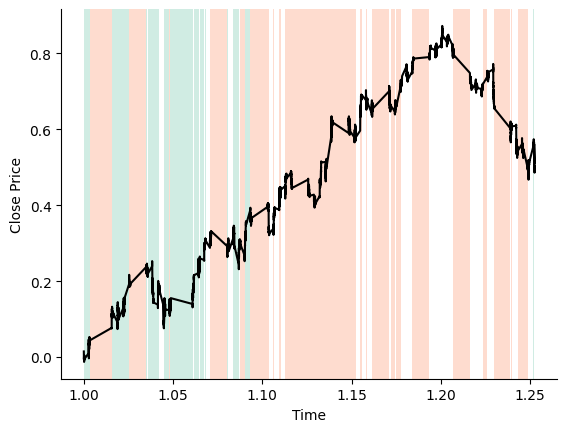

In [11]:
reward = sns.lineplot(x="time", y="close", data=infos[0], color="black")
reward.set(ylabel="Close Price", xlabel="Time")

c = {1: (0.4, 0.7607843137254902, 0.6470588235294118),
     0: (0.9882352941176471, 0.5529411764705883, 0.3843137254901961)
    }
for bucket in position_buckets:
    position = bucket[0]["position"]
    times = list(map(lambda x: x["time"], bucket))
    min_time = np.min(times)
    max_time = np.max(times)
    if min_time == max_time:
        max_time += np.nextafter(0, 1)
    reward.axvspan(xmin=min_time, xmax=max_time, facecolor=c[position], alpha=0.3)

sns.despine()
plt.show()

In [ ]:
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap, BoundaryNorm

cmap = ListedColormap["r", "g"]
norm = BoundaryNorm([0, 1], cmap.N)
ls = LineCollection()


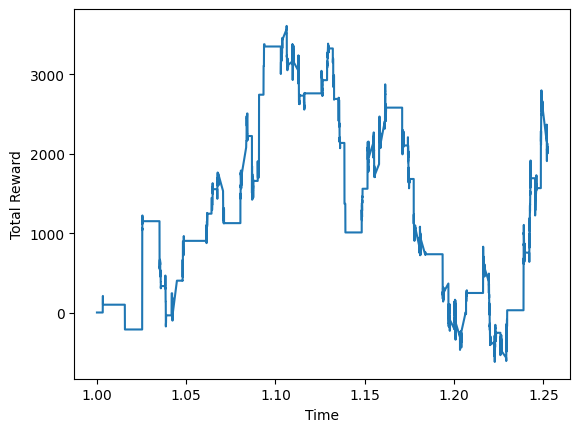

In [53]:
reward = sns.lineplot(x="time", y="total_reward", data=infos[0])
reward.set(ylabel="Total Reward", xlabel="Time")
plt.show()

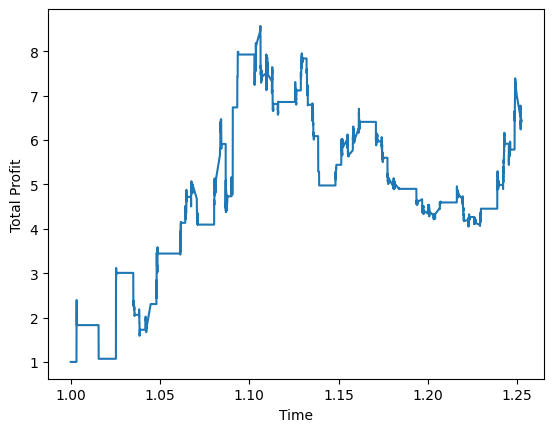

In [ ]:
profit = sns.lineplot(x="time", y="total_profit", data=infos[0])
profit.set(ylabel="Total Profit", xlabel="Time")
plt.show()

In [34]:
combined = pd.concat(infos)
reward_subset = combined[["time", "total_reward"]]
reward_subset = reward_subset.groupby(["time"]).describe().reset_index()
reward_subset.columns = [
        "_".join(col) if col[1] != "" else col[0]
        for col in reward_subset.columns.values
    ]

In [35]:
combined

,total_reward,total_profit,position,time,open,high,low,close,tick_volume,spread,...,twitter_negative_mention_max,twitter_score_count,twitter_score_mean,twitter_score_std,twitter_score_min,twitter_score_25%,twitter_score_50%,twitter_score_75%,twitter_score_max,run
0,0.0,1.0,1,1.000009,0.015143,0.014581,0.015708,0.014954,0.413223,0.5,...,0.161733,0.92,0.284881,0.170952,0.165639,0.251861,0.291256,0.321128,0.386806,0
1,0.0,1.0,1,1.000011,0.014196,0.014012,0.013626,0.012304,0.446281,0.5,...,0.161733,0.92,0.284881,0.170952,0.165639,0.251861,0.291256,0.321128,0.386806,0
2,0.0,1.0,1,1.000013,0.011925,0.011172,0.011734,0.010411,0.479339,0.5,...,0.161733,0.92,0.284881,0.170952,0.165639,0.251861,0.291256,0.321128,0.386806,0
3,0.0,1.0,1,1.000016,0.010411,0.011740,0.011355,0.009843,0.429752,0.5,...,0.161733,0.92,0.284881,0.170952,0.165639,0.251861,0.291256,0.321128,0.386806,0
4,0.0,1.0,1,1.000018,0.009654,0.011172,0.009463,0.007571,0.429752,0.5,...,0.161733,0.92,0.284881,0.170952,0.165639,0.251861,0.291256,0.321128,0.386806,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19488,0.0,1.0,1,1.252535,0.500473,0.501610,0.502082,0.500473,0.380165,0.5,...,0.033891,0.04,0.296974,0.000000,0.313656,0.296974,0.296974,0.296974,0.296974,2
19489,0.0,1.0,1,1.252537,0.500663,0.501420,0.502460,0.501988,0.371901,0.5,...,0.033891,0.04,0.296974,0.000000,0.313656,0.296974,0.296974,0.296974,0.296974,2
19490,0.0,1.0,1,1.252539,0.501798,0.501610,0.498864,0.497255,0.404959,0.5,...,0.033891,0.04,0.296974,0.000000,0.313656,0.296974,0.296974,0.296974,0.296974,2
19491,0.0,1.0,1,1.252542,0.496687,0.498390,0.498675,0.499148,0.338843,0.5,...,0.033891,0.04,0.296974,0.000000,0.313656,0.296974,0.296974,0.296974,0.296974,2


In [36]:
tr = combined[["time", "total_reward"]]
tr

,time,total_reward
0,1.000009,0.0
1,1.000011,0.0
2,1.000013,0.0
3,1.000016,0.0
4,1.000018,0.0
...,...,...
19488,1.252535,0.0
19489,1.252537,0.0
19490,1.252539,0.0
19491,1.252542,0.0


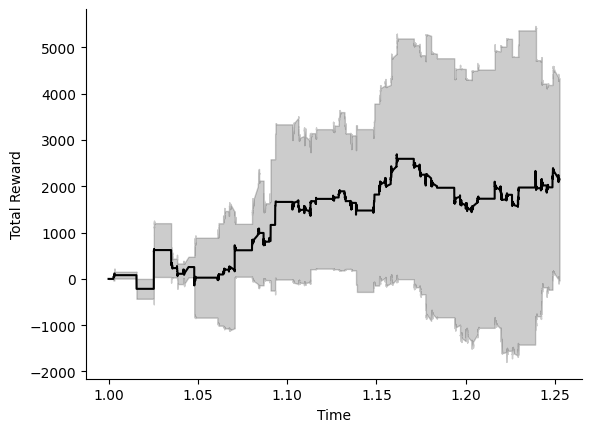

In [55]:
# color = (0.4, 0.7607843137254902, 0.6470588235294118)
color = "black"

profit = sns.lineplot(x="time", y="total_reward", data=combined, errorbar="sd", color=color)
profit.set(ylabel="Total Reward", xlabel="Time")

sns.despine()
plt.show()

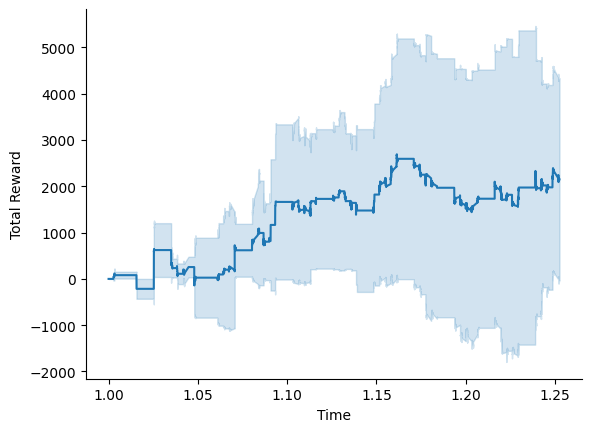

In [38]:
profit = sns.lineplot(x="time", y="total_reward", data=combined, errorbar="sd")
profit.set(ylabel="Total Reward", xlabel="Time")

sns.despine()
plt.show()

/tmp/ipykernel_37869/616534195.py:2: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  profit = sns.lineplot(x="time", y="total_reward", hue="run", data=tr, errorbar="sd", palette=sns.color_palette())


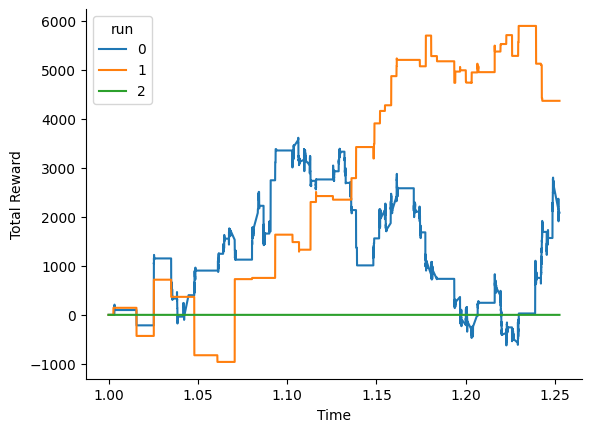

In [45]:
tr = combined[["time", "total_reward", "run"]]
profit = sns.lineplot(x="time", y="total_reward", hue="run", data=tr, errorbar="sd", palette=sns.color_palette())
profit.set(ylabel="Total Reward", xlabel="Time")

sns.despine()
plt.show()

In [ ]:
combined_cat = pd.concat(infos)

In [64]:
sns.load_dataset("fmri")

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970
...,...,...,...,...,...
1059,s0,8,cue,frontal,0.018165
1060,s13,7,cue,frontal,-0.029130
1061,s12,7,cue,frontal,-0.004939
1062,s11,7,cue,frontal,-0.025367


<AxesSubplot:xlabel='timepoint', ylabel='signal'>

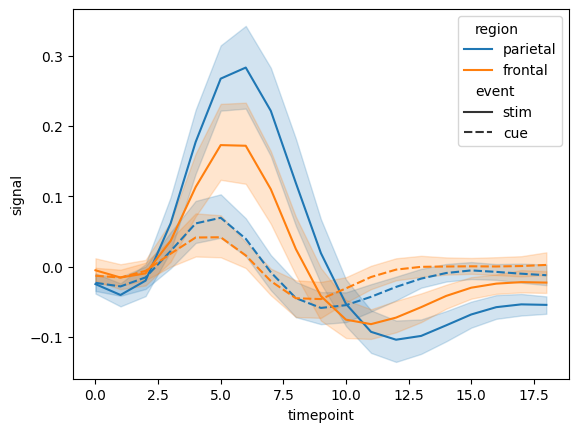

In [66]:
sns.lineplot(x="timepoint", y="signal",
             hue="region", style="event",
             data=sns.load_dataset("fmri"))


In [21]:
sns.color_palette("Set2")


[(0.4, 0.7607843137254902, 0.6470588235294118),
 (0.9882352941176471, 0.5529411764705883, 0.3843137254901961),
 (0.5529411764705883, 0.6274509803921569, 0.796078431372549),
 (0.9058823529411765, 0.5411764705882353, 0.7647058823529411),
 (0.6509803921568628, 0.8470588235294118, 0.32941176470588235),
 (1.0, 0.8509803921568627, 0.1843137254901961),
 (0.8980392156862745, 0.7686274509803922, 0.5803921568627451),
 (0.7019607843137254, 0.7019607843137254, 0.7019607843137254)]

In [22]:
print(sns.color_palette("Set2"))

[(0.4, 0.7607843137254902, 0.6470588235294118), (0.9882352941176471, 0.5529411764705883, 0.3843137254901961), (0.5529411764705883, 0.6274509803921569, 0.796078431372549), (0.9058823529411765, 0.5411764705882353, 0.7647058823529411), (0.6509803921568628, 0.8470588235294118, 0.32941176470588235), (1.0, 0.8509803921568627, 0.1843137254901961), (0.8980392156862745, 0.7686274509803922, 0.5803921568627451), (0.7019607843137254, 0.7019607843137254, 0.7019607843137254)]


In [60]:
print(sns.color_palette("Set2")[0])
print(sns.color_palette("Set2")[1])

(0.4, 0.7607843137254902, 0.6470588235294118)
(0.9882352941176471, 0.5529411764705883, 0.3843137254901961)


In [43]:
print(sns.color_palette("pastel")[0])

(0.6313725490196078, 0.788235294117647, 0.9568627450980393)
